Project 1 - Mental Health in Tech

By: Matthew Idle, Chad Fletcher, Lori Vitaioli, Brady Ogega, Cindy Hansel, Heather Shoberg, Jennifer White

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint
from pathlib import Path

# File locations
survey_2014 = "Resources/2014-survey.csv"
survey_2016 = "Resources/2016-survey.csv"
survey_2017 = "Resources/2017-survey.csv"
survey_2018 = "Resources/2018-survey.csv"
survey_2019 = "Resources/2019-survey.csv"

# Reading the data
s_2014_data = pd.read_csv(survey_2014)
s_2016_data = pd.read_csv(survey_2016)
s_2017_data = pd.read_csv(survey_2017)
s_2018_data = pd.read_csv(survey_2018)
s_2019_data = pd.read_csv(survey_2019)


In [2]:
# retrieve desired columns from "narrowed" 2016
#desired_column_list = narrowed_2016_data.columns
desired_column_list = ['What is your age?', 'What is your gender?',
       'What country do you work in?', 'Do you work remotely?',
       'How many employees does your company or organization have?',
       'Have you had a mental health disorder in the past?',
       'Do you currently have a mental health disorder?',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
       'Would you bring up a mental health issue with a potential employer in an interview?',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:']

# create a new dataframe for further cleaning
narrowed_2016 = s_2016_data[desired_column_list]
narrowed_2016.head()

,What is your age?,What is your gender?,What country do you work in?,Do you work remotely?,How many employees does your company or organization have?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"
0,39,Male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,NaN,Yes,Some of my previous employers,Very easy
1,29,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,NaN,Yes,Some of my previous employers,Somewhat easy
2,38,Male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult
3,43,male,United Kingdom,Sometimes,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN
4,43,Female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult


In [3]:
# change column names
new_column_names = ['age',  
            'original_gender',  
            'country',  
            'remote',  
            'num_employees',  
            'disorder_past',  
            'disorder_current', 
            'bring_up_phys_issue_in_interview', 
            'bring_up_mh_issue_in_interview', 
            'obs_exper_bad_resp_cur_prev', 
            'obs_of_other_inhibit_discuss_curr', 
            'comf_discuss_mh_disorder_cur_superv', 
            'willing_discuss_mh_issue_prev_superv', 
            'request_med_leave']
narrowed_2016.columns = new_column_names
narrowed_2016.head(40)

,age,original_gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave
0,39,Male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,NaN,Yes,Some of my previous employers,Very easy
1,29,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,NaN,Yes,Some of my previous employers,Somewhat easy
2,38,Male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult
3,43,male,United Kingdom,Sometimes,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN
4,43,Female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult
5,42,Male,United Kingdom,Sometimes,More than 1000,No,Yes,Yes,Maybe,"Yes, I experienced",No,Yes,"No, at none of my previous employers",Somewhat easy
6,30,M,United States of America,Sometimes,26-100,No,No,Yes,Yes,No,NaN,Yes,"Yes, at all of my previous employers",Somewhat easy
7,37,female,United States of America,Always,More than 1000,Yes,Yes,No,No,"Yes, I observed",Maybe,Yes,Some of my previous employers,Very easy
8,44,Female,United States of America,Sometimes,26-100,Yes,Yes,Maybe,Maybe,"Yes, I observed",No,Maybe,"No, at none of my previous employers",Very difficult
9,30,Male,United States of America,Always,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN


In [4]:
########## clean gender column

# find unique values from free-form answers
gender_list = narrowed_2016["original_gender"].unique()
gender_list

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [5]:
# create gender categories of male, female, other_varied, non_answer
# (note that this does not fill in blanks)
male_list = ['Male',
             'male',
             'Male ',
             'M',
             'm',
             'man',
             'Cis male',
             'Male.',
             'Male (cis)',
             'Man',
             'Sex is male',
             'cis male',
             'Malr',
             'Dude', 
             "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
             'mail',
             'male ',
             'Cis Male',
             'cisdude',
             'cis man', 
             'MALE']

female_list =['Female', 
              'female', 
              'I identify as female.', 
              'female ',
              'Female assigned at birth ', 
              'F', 
              'Woman', 
              'f',
              'Cis female ', 
              'Female ',
              'woman', 
              'female/woman',
              'Cisgender Female', 
              'fem', 
              'Female (props for making this a freeform field, though)',
              ' Female', 
              'Cis-woman', 
              'female-bodied; no feelings about gender', 
              'AFAB',
              'fm'  ]

other_gender_list = ['Bigender',  
                     'non-binary',  
                     'Transitioned, M2F',  
                     'Genderfluid (born female)',  
                     'Other/Transfeminine', 
                     'Female or Multi-Gender Femme',  
                     'Androgynous',
                     'male 9:1 female, roughly', 
                     'Other', 
                     'nb masculine',  
                     'genderqueer', 
                     'Human', 
                     'Genderfluid', 
                     'Enby', 
                     'genderqueer woman', 
                     'mtf', 
                     'Queer',
                     'Agender', 
                     'Fluid', 
                     'Male/genderqueer', 
                     'Nonbinary', 
                     'human', 
                     'Unicorn', 
                     'Male (trans, FtM)', 
                     'Genderqueer', 
                     'Genderflux demi-girl',
                     'Transgender woman',]

no_answer_list = ['nan', 'none of your business',  'M|']

# check that all values are accounted for with counts
print(f"There are", len(gender_list), "unique original gender values")
print(f"There are", len(male_list), "unique male values")
print(f"There are", len(female_list), "unique female values")
print(f"There are", len(other_gender_list), "unique other gender values")
print(f"There are", len(no_answer_list), "unique no answer values")

if len(gender_list) != len(male_list) + len(female_list) + len(other_gender_list) + len(no_answer_list):
    print('Counts do not add up - check gender lists')
else:
    print("Counts look good")


There are 71 unique original gender values
There are 21 unique male values
There are 20 unique female values
There are 27 unique other gender values
There are 3 unique no answer values
Counts look good


In [6]:
# create new column called 'gender' and assign values based on the gender categories
narrowed_2016.insert(loc=2, column='gender', value='')

# create a list for new gender values
new_gender_list = []
for gender in narrowed_2016["original_gender"]:
    if gender in male_list:
        new_gender_list.append("male")
    elif gender in female_list:
        new_gender_list.append("female")
    elif gender in other_gender_list:
        new_gender_list.append("other")
    else:
        new_gender_list.append("")       

# copy df and assign values to the gender column
clean_2016 = pd.DataFrame(narrowed_2016).copy()
clean_2016['gender'] = new_gender_list

print(clean_2016['gender'].unique())
clean_2016.head()

['male' 'female' 'other' '']


,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave
0,39,Male,male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,NaN,Yes,Some of my previous employers,Very easy
1,29,male,male,United States of America,Never,6-25,Yes,Yes,Maybe,No,No,NaN,Yes,Some of my previous employers,Somewhat easy
2,38,Male,male,United Kingdom,Always,6-25,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult
3,43,male,male,United Kingdom,Sometimes,NaN,Yes,Yes,Yes,Maybe,No,NaN,NaN,Some of my previous employers,NaN
4,43,Female,female,United States of America,Sometimes,6-25,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult


In [7]:
# Fill blank or nan cells with "No Response"
clean_2016 = clean_2016.fillna(
    {
        "num_employees": 'No Response',
        "gender": 'No Response',
        "obs_exper_bad_resp_cur_prev": 'No Response',
        "obs_of_other_inhibit_discuss_curr": 'No Response',
        "comf_discuss_mh_disorder_cur_superv": 'No Response',
        "willing_discuss_mh_issue_prev_superv": 'No Response',
        "request_med_leave": 'No Response'
    }
)
clean_2016.count()

age                                     1433
original_gender                         1430
gender                                  1433
country                                 1433
remote                                  1433
num_employees                           1433
disorder_past                           1433
disorder_current                        1433
bring_up_phys_issue_in_interview        1433
bring_up_mh_issue_in_interview          1433
obs_exper_bad_resp_cur_prev             1433
obs_of_other_inhibit_discuss_curr       1433
comf_discuss_mh_disorder_cur_superv     1433
willing_discuss_mh_issue_prev_superv    1433
request_med_leave                       1433
dtype: int64

In [13]:
clean_2016["request_med_leave"].value_counts()

request_med_leave
No Response                   287
Somewhat easy                 281
Very easy                     220
Somewhat difficult            199
Neither easy nor difficult    178
I don't know                  150
Very difficult                118
Name: count, dtype: int64

In [45]:
age_req_time_off_df=clean_2016[['age','request_med_leave']]
age_req_time_off_df.head()

,age,request_med_leave
0,39,Very easy
1,29,Somewhat easy
2,38,Neither easy nor difficult
3,43,No Response
4,43,Neither easy nor difficult


In [52]:
age_req_time_off_df = age_req_time_off_df[(age_req_time_off_df['age'] < 80) & (age_req_time_off_df['age'] > 15)]


In [53]:

def potential_outliers(pd_series, column_name):
    series_avg=pd_series.mean
    q1 = pd_series.quantile(0.25)
    q3 = pd_series.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    outliers = pd_series[(pd_series < lower_bound) | (pd_series > upper_bound)]
    print(f"{column_name}'s potential outliers: {outliers}")



request_med_leave_result=["Very easy","Somewhat easy", "Neither easy nor difficult", "Very difficult", "I don't know", "No Response"]

# Create empty list to fill with tumor vol data (for plotting)
ver_ez=[]
sw_ez=[]
nez_norh=[]
very_diff=[]
idk=[]
nr=[]

for index, row in age_req_time_off_df.iterrows():
    if row["request_med_leave"] == request_med_leave_result[0]:
        ver_ez.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[1]:
        sw_ez.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[2]:
        nez_norh.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[3]:
        very_diff.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[4]:
        idk.append(row["age"])
    elif row["request_med_leave"] == request_med_leave_result[5]:
        nr.append(row["age"])
       
ver_ez_series = pd.Series(ver_ez, name=request_med_leave_result[0])
sw_ez_series = pd.Series(sw_ez, name=request_med_leave_result[1])
nez_norh_ez_series = pd.Series(nez_norh, name=request_med_leave_result[2])
very_diff_series = pd.Series(very_diff, name=request_med_leave_result[3])
idk_series = pd.Series(idk, name=request_med_leave_result[4])
nr_series = pd.Series(nr, name=request_med_leave_result[5])
#

potential_outliers(ver_ez_series,"Very easy") 
potential_outliers(sw_ez_series,"Somewhat easy")
potential_outliers(nez_norh_ez_series,"Neither easy nor difficult")
potential_outliers(very_diff_series,"Very difficult")
potential_outliers(idk_series,"I don't know")
potential_outliers(nr_series,"No Response ")
#sw_ez_series.head()
#print(ver_ez)

Very easy's potential outliers: 29     55
61     55
113    53
123    63
164    52
176    51
Name: Very easy, dtype: int64
Somewhat easy's potential outliers: 99     57
112    55
181    51
257    56
Name: Somewhat easy, dtype: int64
Neither easy nor difficult's potential outliers: 67     61
81     62
94     54
152    70
155    63
Name: Neither easy nor difficult, dtype: int64
Very difficult's potential outliers: 46    59
80    57
86    57
Name: Very difficult, dtype: int64
I don't know's potential outliers: 67    58
Name: I don't know, dtype: int64
No Response 's potential outliers: 46     63
169    65
179    63
Name: No Response, dtype: int64


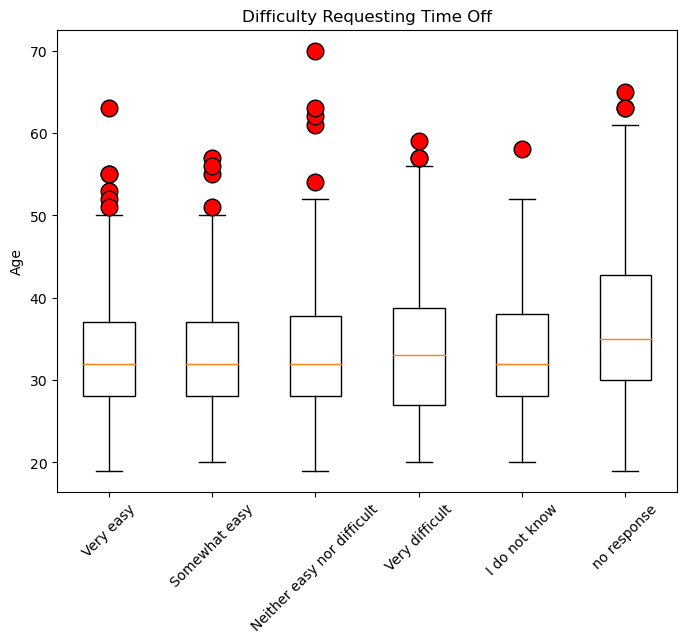

In [57]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6))

# Create a boxplot for the desired column with custom colors
columns_to_plot = [ver_ez_series, sw_ez_series, nez_norh_ez_series, very_diff_series,idk_series,nr_series]
flierprops = dict(markerfacecolor='red',markersize=12)
labels = ["Very easy","Somewhat easy", "Neither easy nor difficult", "Very difficult", "I do not know", "no response"]

boxplot = ax.boxplot(columns_to_plot, patch_artist=True,flierprops=flierprops, labels=labels)

for box in boxplot['boxes']:
    box.set(facecolor='white')  # You can change 'white' to the desired color


# Customize the appearance
ax.grid(False)
ax.set_ylabel("Age")
plt.title('Difficulty Requesting Time Off') 
plt.xticks(rotation=45)
plt.savefig('age_diff_req_TO.png')
plt.show()

In [ ]:
def age_req_off_stat(df,):
    summary_stats = df.age_req_time_off_df
    # Create a new DataFrame with the desired statistics in a column
    result_df = pd.DataFrame({
        'Mean': summary_stats['mean'],
        'Std': summary_stats['std'],
        'Min': summary_stats['min'],,
        'Max': summary_stats['max']   
    })
    result_df.head()
    return result_df



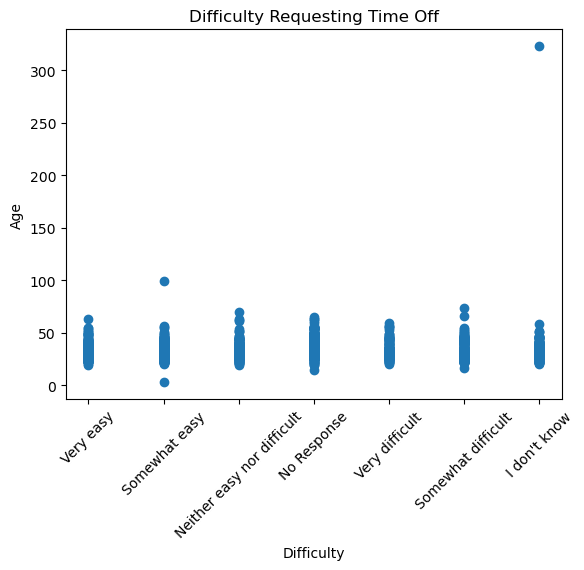

In [33]:
# Create a scatter plot
plt.scatter(age_req_time_off_df['request_med_leave'], age_req_time_off_df['age'])

# Add labels and a title
plt.xlabel('Difficulty')
plt.ylabel('Age')
plt.title('Difficulty Requesting Time Off') 
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [ ]:

# Calculate quartiles and IQR
ages_q1 = clean_2016["age"].quantile(0.25)
ages_q3 = clean_2016["age"].quantile(0.75)
ages_IQR = ages_q3 - ages_q1

# Define lower and upper bounds
ages_low_bnd = ages_q1 - (1.5 * ages_IQR)
ages_upr_bnd = ages_q3 + (1.5 * ages_IQR)

# Identify potential outliers
ages_outliers = clean_2016[(clean_2016["age"] < ages_low_bnd) | (clean_2016["age"] > ages_upr_bnd)]['age']

# Customizing boxplot colors
boxprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='black')
capprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Create a boxplot
plt.boxplot(clean_2016["age"],
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            flierprops=flierprops)

plt.title("Ages with Outliers")
plt.ylabel("Age")
plt.show()


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# Calculate mean, median, and standard deviation for the 'Value' column

age_stats = clean_2016["age"].agg(['mean', 'median', 'var', 'std', 'sem'])

print(age_stats)

# Create a summary DataFrame using the aggregated values
ages_summary_df = {
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std':  "Std",
    'sem': 'SEM'
}
summary_df.head(20)

In [ ]:
summary_stats = clean_2016.describe()

# Plotting a bar plot
summary_stats.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Descriptive Statistics for Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

# Create a boxplot for the desired column with custom colors
columns_to_plot = [cap_vol_series, ram_vol_series, inf_vol_series, cef_vol_series]
flierprops = dict(markerfacecolor='red',markersize=12)
labels = ["Capomulin"]

boxplot = ax.boxplot(columns_to_plot, patch_artist=True,flierprops=flierprops, labels=labels)

for box in boxplot['boxes']:
    box.set(facecolor='white')  # You can change 'white' to the desired color


# Customize the appearance
ax.grid(False)
ax.set_ylabel("Final Tumor Volume (mm3)")
# Show the plot
plt.show()

In [ ]:
# Create bins for ages
bins = [0,24,34,44,54,64,74,75]
#age_groups = ["18 to 24","25 to 34","35 to 44","45 to 54","55 to 64","65 to 74","Over 75"]
age_groups = ["18-24","25-34","35-44","45-54","55-64","65-74","75+"]

# Slice the data and place it into bins
age_groups_column = pd.cut(clean_2016["age"], bins, labels=age_groups)
age_groups_column.value_counts()

In [ ]:
#Add a new age groups column
clean_2016["age groups"] = age_groups_column
clean_2016.head()

In [ ]:
narrowed_2016.head()

In [ ]:
#ages_template_data={
#    'Ages 18-24 template':
#    [ages_18_24_template[0],
#     ages_18_24_template[1],
#	 ages_18_24_template[2],
#	 ages_18_24_template[3],
#	 ages_18_24_template[4]],
#	'Ages 25-34 template':
#    [ages_25_34_template[0],
#     ages_25_34_template[1],
#	 ages_25_34_template[2],
#	 ages_25_34_template[3],
#	 ages_25_34_template[4]], 
#	'Ages 35-44 template':
#    [ages_35_44_template[0],
#     ages_35_44_template[1],
#	 ages_35_44_template[2],
#	 ages_35_44_template[3],
#	 ages_35_44_template[4]],
#	'Ages 45-54 template':
#    [ages_45_54_template[0],
#     ages_45_54_template[1],
#	 ages_45_54_template[2],
#	 ages_45_54_template[3],
#	 ages_45_54_template[4]],
#    'Ages 55-64 template':
#    [ages_55_64_template[0],
#     ages_55_64_template[1],
#	 ages_55_64_template[2],
#	 ages_55_64_template[3],
#	 ages_55_64_template[4]],
#	'Ages 65_74 template':
#    [ages_65_74_template[0],
#     ages_65_74_template[1],
#	 ages_65_74_template[2],
#	 ages_65_74_template[3],
#	 ages_65_74_template[4]],
#    'Ages 75+ template':
#    [over_75_template[0],
#     over_75_template[1],
#	 over_75_template[2],
#	 over_75_template[3],
#	 over_75_template[4]],
#}
#ages_template_labels = ['label1','label2','label2','label3']
#ages_template_df = pd.DataFrame(ages_template_data)
#ages_template_df = ages_template_df.set_index(pd.Index(ages_template_labels))
#ages_template_df.head()


In [ ]:
#def age_original_gender(age_group):
#    answers=[0,0,0]
#    column_name="original_gender"
#    male = ((clean_2016[column_name] == "male") & (clean_2016["age groups"] == age_group)).sum()
#    Male  = ((clean_2016[column_name] == "Male") & (clean_2016["age groups"] == age_group)).sum()
#    #Sometimes = ((clean_2016[column_name] == "Sometimes") & (clean_2016["age groups"] == age_group)).sum()
#    answers[0]=male
#    answers[1]=Male
#    #answers[2]=Sometimes
#    print(f"Ages {age_group}: male: {male} Male: {Male}")
#    return answers

In [ ]:

def obs_vs_comf_superv(comf_discuss_response):
    answers=[0,0,0,0,0]
    column1="obs_exper_bad_resp_cur_prev"
    answers[0] = ((clean_2016[column1] == "No") & (clean_2016["comf_discuss_mh_disorder_cur_superv"] == comf_discuss_response)).sum()
    answers[1] = ((clean_2016[column1] == "Maybe/Not sure") & (clean_2016["comf_discuss_mh_disorder_cur_superv"] == comf_discuss_response)).sum()
    answers[2] = ((clean_2016[column1] == "Yes, I observed") & (clean_2016["comf_discuss_mh_disorder_cur_superv"] == comf_discuss_response)).sum()
    answers[3] = ((clean_2016[column1] == "Yes, I experienced") & (clean_2016["comf_discuss_mh_disorder_cur_superv"] == comf_discuss_response)).sum()
    answers[4] = ((clean_2016[column1] == "No Response") & (clean_2016["comf_discuss_mh_disorder_cur_superv"] == comf_discuss_response)).sum()
    print(f"variable: {comf_discuss_response}, No: {answers[0]} Maybe/Not sure: {answers[1]} Yes, I observed: {answers[2]} Yes, I experienced: {answers[3]} No Response: {answers[4]}")
    return answers

In [ ]:
obs_vs_comf_superv_yes=obs_vs_comf_superv("Yes")
obs_vs_comf_superv_maybe=obs_vs_comf_superv("Maybe")
obs_vs_comf_superv_no=obs_vs_comf_superv("No")
obs_vs_comf_superv_no_resp=obs_vs_comf_superv("No Response")

In [ ]:
obs_vs_comf_superv_data={
    'obs_vs_comf_superv_yes':
    [obs_vs_comf_superv_yes[0],
     obs_vs_comf_superv_yes[1],
	 obs_vs_comf_superv_yes[2],
	 obs_vs_comf_superv_yes[3],
	 obs_vs_comf_superv_yes[4]],
	'obs_vs_comf_superv_maybe':
    [obs_vs_comf_superv_maybe[0],
     obs_vs_comf_superv_maybe[1],
	 obs_vs_comf_superv_maybe[2],
	 obs_vs_comf_superv_maybe[3],
	 obs_vs_comf_superv_maybe[4]], 
	'obs_vs_comf_superv_no':
    [obs_vs_comf_superv_no[0],
     obs_vs_comf_superv_no[1],
	 obs_vs_comf_superv_no[2],
	 obs_vs_comf_superv_no[3],
	 obs_vs_comf_superv_no[4]],
	'obs_vs_comf_superv_no_resp':
    [obs_vs_comf_superv_no_resp[0],
     obs_vs_comf_superv_no_resp[1],
	 obs_vs_comf_superv_no_resp[2],
	 obs_vs_comf_superv_no_resp[3],
	 obs_vs_comf_superv_no_resp[4]],
    }
obs_vs_comf_superv_labels = ['no','Maybe/Not sure','Yes, I observed','Yes, I experienced','No Response']
obs_vs_comf_superv_df = pd.DataFrame(obs_vs_comf_superv_data)
obs_vs_comf_superv_df = obs_vs_comf_superv_df.set_index(pd.Index(obs_vs_comf_superv_labels))
obs_vs_comf_superv_df.head()

In [ ]:
# Your DataFrame
obs_vs_comf_superv_data={
    'obs_vs_comf_superv_yes':
    [obs_vs_comf_superv_yes[0],
     obs_vs_comf_superv_yes[1],
	 obs_vs_comf_superv_yes[2],
	 obs_vs_comf_superv_yes[3],
	 obs_vs_comf_superv_yes[4]],
	'obs_vs_comf_superv_maybe':
    [obs_vs_comf_superv_maybe[0],
     obs_vs_comf_superv_maybe[1],
	 obs_vs_comf_superv_maybe[2],
	 obs_vs_comf_superv_maybe[3],
	 obs_vs_comf_superv_maybe[4]], 
	'obs_vs_comf_superv_no':
    [obs_vs_comf_superv_no[0],
     obs_vs_comf_superv_no[1],
	 obs_vs_comf_superv_no[2],
	 obs_vs_comf_superv_no[3],
	 obs_vs_comf_superv_no[4]],
	'obs_vs_comf_superv_no_resp':
    [obs_vs_comf_superv_no_resp[0],
     obs_vs_comf_superv_no_resp[1],
	 obs_vs_comf_superv_no_resp[2],
	 obs_vs_comf_superv_no_resp[3],
	 obs_vs_comf_superv_no_resp[4]],
    }

obs_vs_comf_superv_labels = ['no','Maybe/Not sure','Yes, I observed','Yes, I experienced','No Response']

obs_vs_comf_superv_df = pd.DataFrame(obs_vs_comf_superv_data, index=obs_vs_comf_superv_labels)

# Convert values to percentages
obs_vs_comf_superv_df_percent = obs_vs_comf_superv_df.div(obs_vs_comf_superv_df.sum(axis=1), axis=0) * 100

# Plotting
ax = obs_vs_comf_superv_df_percent.plot(kind='bar', rot=45)

# Adding labels and title
ax.set_xlabel('observed or experienced a  badly handled response')
ax.set_ylabel('comfortable discussing mental health with direct supervisor')
ax.set_title('Percentage Distribution by Category')

# Display the percentages on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', rotation=45)

plt.show()

In [ ]:
ax=obs_vs_comf_superv_df.plot.bar(rot=45)
ax.set_xlabel("obs_exper_bad_resp_cur_prev")
ax.set_ylabel("comf_discuss_mh_disorder_cur_superv")


In [ ]:

def age_obs_exper_bad_resp_cur_prev(age_group):
    answers=[0,0,0,0,0]
    column_name="obs_exper_bad_resp_cur_prev"
    answers[0] = ((clean_2016[column_name] == "No") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "Maybe/Not sure") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "Yes, I observed") & (clean_2016["age groups"] == age_group)).sum()
    answers[3] = ((clean_2016[column_name] == "Yes, I experienced") & (clean_2016["age groups"] == age_group)).sum()
    answers[4] = ((clean_2016[column_name] == "No Response") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [ ]:
ages_18_24_obs_exper_bad_resp_cur_prev=age_obs_exper_bad_resp_cur_prev("18-24")
ages_25_34_obs_exper_bad_resp_cur_prev=age_obs_exper_bad_resp_cur_prev("25-34")
ages_35_44_obs_exper_bad_resp_cur_prev=age_obs_exper_bad_resp_cur_prev("35-44")
ages_45_54_obs_exper_bad_resp_cur_prev=age_obs_exper_bad_resp_cur_prev("45-54")
ages_55_64_obs_exper_bad_resp_cur_prev=age_obs_exper_bad_resp_cur_prev("55-64")
ages_65_74_obs_exper_bad_resp_cur_prev=age_obs_exper_bad_resp_cur_prev("65-74")
over_75_obs_exper_bad_resp_cur_prev=age_obs_exper_bad_resp_cur_prev("75+")

In [ ]:
ages_obs_exper_bad_resp_cur_prev_data={
    'Ages 18-24 obs_exper_bad_resp_cur_prev':
    [ages_18_24_obs_exper_bad_resp_cur_prev[0],
     ages_18_24_obs_exper_bad_resp_cur_prev[1],
	 ages_18_24_obs_exper_bad_resp_cur_prev[2],
	 ages_18_24_obs_exper_bad_resp_cur_prev[3],
	 ages_18_24_obs_exper_bad_resp_cur_prev[4]],
	'Ages 25-34 obs_exper_bad_resp_cur_prev':
    [ages_25_34_obs_exper_bad_resp_cur_prev[0],
     ages_25_34_obs_exper_bad_resp_cur_prev[1],
	 ages_25_34_obs_exper_bad_resp_cur_prev[2],
	 ages_25_34_obs_exper_bad_resp_cur_prev[3],
	 ages_25_34_obs_exper_bad_resp_cur_prev[4]], 
	'Ages 35-44 obs_exper_bad_resp_cur_prev':
    [ages_35_44_obs_exper_bad_resp_cur_prev[0],
     ages_35_44_obs_exper_bad_resp_cur_prev[1],
	 ages_35_44_obs_exper_bad_resp_cur_prev[2],
	 ages_35_44_obs_exper_bad_resp_cur_prev[3],
	 ages_35_44_obs_exper_bad_resp_cur_prev[4]],
	'Ages 45-54 obs_exper_bad_resp_cur_prev':
    [ages_45_54_obs_exper_bad_resp_cur_prev[0],
     ages_45_54_obs_exper_bad_resp_cur_prev[1],
	 ages_45_54_obs_exper_bad_resp_cur_prev[2],
	 ages_45_54_obs_exper_bad_resp_cur_prev[3],
	 ages_45_54_obs_exper_bad_resp_cur_prev[4]],
    'Ages 55-64 obs_exper_bad_resp_cur_prev':
    [ages_55_64_obs_exper_bad_resp_cur_prev[0],
     ages_55_64_obs_exper_bad_resp_cur_prev[1],
	 ages_55_64_obs_exper_bad_resp_cur_prev[2],
	 ages_55_64_obs_exper_bad_resp_cur_prev[3],
	 ages_55_64_obs_exper_bad_resp_cur_prev[4]],
	'Ages 65_74 obs_exper_bad_resp_cur_prev':
    [ages_65_74_obs_exper_bad_resp_cur_prev[0],
     ages_65_74_obs_exper_bad_resp_cur_prev[1],
	 ages_65_74_obs_exper_bad_resp_cur_prev[2],
	 ages_65_74_obs_exper_bad_resp_cur_prev[3],
	 ages_65_74_obs_exper_bad_resp_cur_prev[4]],
    'Ages 75+ obs_exper_bad_resp_cur_prev':
    [over_75_obs_exper_bad_resp_cur_prev[0],
     over_75_obs_exper_bad_resp_cur_prev[1],
	 over_75_obs_exper_bad_resp_cur_prev[2],
	 over_75_obs_exper_bad_resp_cur_prev[3],
	 over_75_obs_exper_bad_resp_cur_prev[4]],
}
ages_obs_exper_bad_resp_cur_prev_labels = ['No','Maybe/Not sure','Yes, I observed','Yes, I experienced','No Response']
ages_obs_exper_bad_resp_cur_prev_df = pd.DataFrame(ages_obs_exper_bad_resp_cur_prev_data)
ages_obs_exper_bad_resp_cur_prev_df = ages_obs_exper_bad_resp_cur_prev_df.set_index(pd.Index(ages_obs_exper_bad_resp_cur_prev_labels))
ages_obs_exper_bad_resp_cur_prev_df.head()



In [ ]:
#Ages: Do you work remotely?
#remote [0]=always,[1]=never,[2]=sometime
ages_18_24_remote=age_remote("18-24")
ages_25_34_remote=age_remote("25-34")
ages_35_44_remote=age_remote("35-44")
ages_45_54_remote=age_remote("45-54")
ages_55_64_remote=age_remote("55-64")
ages_65_74_remote=age_remote("65-74")
over_75_remote=age_remote("75+")

In [ ]:
ages_obs_exper_bad_resp_cur_prev_df .plot.bar(rot=45)

In [ ]:
#Gender
def age_gender(age_group):
    answers=[0,0,0]
    column_name="gender"
    answers[0] = ((clean_2016[column_name] == "male") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "female") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "other") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [ ]:
#Ages: Gender?
#remote [0]=male,[1]=female, [2]=other
ages_18_24_gender=age_gender("18-24")
ages_25_34_gender=age_gender("25-34")
ages_35_44_gender=age_gender("35-44")
ages_45_54_gender=age_gender("45-54")
ages_55_64_gender=age_gender("55-64")
ages_65_74_gender=age_gender("65-74")
over_75_gender=age_gender("75+")

In [ ]:
ages_gender_data={
    'Ages 18-24 gender':
    [ages_18_24_gender[0],
     ages_18_24_gender[1],
	 ages_18_24_gender[2]],
	'Ages 25-34 gender':
    [ages_25_34_gender[0],
     ages_25_34_gender[1],
	 ages_25_34_gender[2]],
	'Ages 35-44 gender':
    [ages_35_44_gender[0],
     ages_35_44_gender[1],
	 ages_35_44_gender[2]],
	'Ages 45-54 gender':
    [ages_45_54_gender[0],
     ages_45_54_gender[1],
	 ages_45_54_gender[2]],
    'Ages 55-64 gender':
    [ages_55_64_gender[0],
     ages_55_64_gender[1],
	 ages_55_64_gender[2]],
	'Ages 65_74 gender':
    [ages_65_74_gender[0],
     ages_65_74_gender[1],
	 ages_65_74_gender[2]],
    'Ages 75+ gender':
    [over_75_gender[0],
     over_75_gender[1],
	 over_75_gender[2]],
}
ages_gender_labels = ['Male','Female','Other']
ages_gender_df = pd.DataFrame(ages_gender_data)
ages_gender_df = ages_gender_df.set_index(pd.Index(ages_gender_labels))
ages_gender_df.head()

In [ ]:
ages_gender_df.plot.bar(stacked=True)

# Age: Do you work remotely?

In [ ]:
#Do you work remotely?
def age_remote(age_group):
    answers=[0,0,0]
    column_name="remote"
    answers[0] = ((clean_2016[column_name] == "Always") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "Never") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "Sometimes") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [ ]:
#Ages: Do you work remotely?
#remote [0]=always,[1]=never,[2]=sometime
ages_18_24_remote=age_remote("18-24")
ages_25_34_remote=age_remote("25-34")
ages_35_44_remote=age_remote("35-44")
ages_45_54_remote=age_remote("45-54")
ages_55_64_remote=age_remote("55-64")
ages_65_74_remote=age_remote("65-74")
over_75_remote=age_remote("75+")

In [ ]:
ages_18_44_remote_data={
    'Ages 18-24 Work Remotely': [ages_18_24_remote[0],ages_18_24_remote[1],ages_18_24_remote[2]],
    'Ages 25-34 Work Remotely': [ages_25_34_remote[0],ages_25_34_remote[1],ages_25_34_remote[2]],
    'Ages 35-44 Work Remotely': [ages_35_44_remote[0],ages_35_44_remote[1],ages_35_44_remote[2]],
}
ages_18_44_remote_df = pd.DataFrame(ages_18_44_remote_data)
ages_18_44_remote_labels = ['Always','Never','Sometimes']
ages_18_44_remote_df = ages_18_44_remote_df.set_index(pd.Index(ages_remote_labels))
ages_18_44_remote_df.head()

In [ ]:
#Ages: Do you work remotely?
#remote [0]=always,[1]=never,[2]=sometime
ages_18_24_remote=age_remote("18-24")
ages_25_34_remote=age_remote("25-34")
ages_35_44_remote=age_remote("35-44")
ages_45_54_remote=age_remote("45-54")
ages_55_64_remote=age_remote("55-64")
ages_65_74_remote=age_remote("65-74")
over_75_remote=age_remote("75+")

In [ ]:
ages_remote_df.plot.bar(stacked=True)

# Age: #Would you HAVE BEEN willing to discuss a mental health issue with your direct supervisor(s)?

In [ ]:
#Would you HAVE BEEN willing to discuss a mental health issue with your direct supervisor(s)?#Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
#willing_discuss_mh_issue_prev_superv  [0]=Some, [1]=No, none, [2]=No Response, [3]=I don't know [4]=Yes, all
def age_willing_discuss_mh_issue_prev_superv(age_group):
    answers=[0,0,0,0,0]
    column_name="willing_discuss_mh_issue_prev_superv"
    answers[0] = ((clean_2016[column_name] == "Some of my previous employers") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "No, at none of my previous employers") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "No Response") & (clean_2016["age groups"] == age_group)).sum()
    answers[3] = ((clean_2016[column_name] == "I don't know") & (clean_2016["age groups"] == age_group)).sum()
    answers[4] = ((clean_2016[column_name] == "Yes, at all of my previous employers") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [ ]:
#Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
#willing_discuss_mh_issue_prev_superv  [0]=Some, [1]=No, none, [2]=No Response, [3]=I don't know [4]=Yes, all
ages_18_24_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("18-24")
ages_25_34_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("25-34")
ages_35_44_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("35-44")
ages_45_54_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("45-54")
ages_55_64_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("55-64")
ages_65_74_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("65-74")
over_75_willing_discuss_mh_issue_prev_superv=age_willing_discuss_mh_issue_prev_superv("75+")

In [ ]:
#Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
ages_willing_discuss_mh_issue_prev_superv_data={
    'Ages 18-24 willing_discuss_mh_issue_prev_superv':[ages_18_24_willing_discuss_mh_issue_prev_superv[0],
     ages_18_24_willing_discuss_mh_issue_prev_superv[1],
	 ages_18_24_willing_discuss_mh_issue_prev_superv[2],
	 ages_18_24_willing_discuss_mh_issue_prev_superv[3],
	 ages_18_24_willing_discuss_mh_issue_prev_superv[4]],
	'Ages 25-34 willing_discuss_mh_issue_prev_superv':[ages_25_34_willing_discuss_mh_issue_prev_superv[0],
     ages_25_34_willing_discuss_mh_issue_prev_superv[1],
	 ages_25_34_willing_discuss_mh_issue_prev_superv[2],
	 ages_25_34_willing_discuss_mh_issue_prev_superv[3],
	 ages_25_34_willing_discuss_mh_issue_prev_superv[4]], 
	'Ages 35-44 willing_discuss_mh_issue_prev_superv':[ages_35_44_willing_discuss_mh_issue_prev_superv[0],
     ages_35_44_willing_discuss_mh_issue_prev_superv[1],
	 ages_35_44_willing_discuss_mh_issue_prev_superv[2],
	 ages_35_44_willing_discuss_mh_issue_prev_superv[3],
	 ages_35_44_willing_discuss_mh_issue_prev_superv[4]],
	'Ages 45-54 willing_discuss_mh_issue_prev_superv':[ages_45_54_willing_discuss_mh_issue_prev_superv[0],
     ages_45_54_willing_discuss_mh_issue_prev_superv[1],
	 ages_45_54_willing_discuss_mh_issue_prev_superv[2],
	 ages_45_54_willing_discuss_mh_issue_prev_superv[3],
	 ages_45_54_willing_discuss_mh_issue_prev_superv[4]],
    'Ages 55-64 willing_discuss_mh_issue_prev_superv':[ages_55_64_willing_discuss_mh_issue_prev_superv[0],
     ages_55_64_willing_discuss_mh_issue_prev_superv[1],
	 ages_55_64_willing_discuss_mh_issue_prev_superv[2],
	 ages_55_64_willing_discuss_mh_issue_prev_superv[3],
	 ages_55_64_willing_discuss_mh_issue_prev_superv[4]],
	'Ages 65_74 willing_discuss_mh_issue_prev_superv':[ages_65_74_willing_discuss_mh_issue_prev_superv[0],
     ages_65_74_willing_discuss_mh_issue_prev_superv[1],
	 ages_65_74_willing_discuss_mh_issue_prev_superv[2],
	 ages_65_74_willing_discuss_mh_issue_prev_superv[3],
	 ages_65_74_willing_discuss_mh_issue_prev_superv[4]],
    'Ages 75+ willing_discuss_mh_issue_prev_superv':[over_75_willing_discuss_mh_issue_prev_superv[0],
     over_75_willing_discuss_mh_issue_prev_superv[1],
	 over_75_willing_discuss_mh_issue_prev_superv[2],
	 over_75_willing_discuss_mh_issue_prev_superv[3],
	 over_75_willing_discuss_mh_issue_prev_superv[4]],
}
ages_willing_discuss_mh_issue_prev_superv_labels = ['Some of my previous employers','No, at none of my previous employers','No Response','I do not know','Yes, at all of my previous employers']
ages_willing_discuss_mh_issue_prev_superv_df = pd.DataFrame(ages_willing_discuss_mh_issue_prev_superv_data)
ages_willing_discuss_mh_issue_prev_superv_df = ages_willing_discuss_mh_issue_prev_superv_df.set_index(pd.Index(ages_willing_discuss_mh_issue_prev_superv_labels))
ages_willing_discuss_mh_issue_prev_superv_df.head()



In [ ]:
ages_willing_discuss_mh_issue_prev_superv_df.plot.bar(stacked=True)

# #Do you currently have a mental health disorder?

In [ ]:
#Do you currently have a mental health disorder?
def age_disorder_current(age_group):
    answers=[0,0,0]
    column_name="disorder_current"
    answers[0] = ((clean_2016[column_name] == "Yes") & (clean_2016["age groups"] == age_group)).sum()
    answers[1] = ((clean_2016[column_name] == "No") & (clean_2016["age groups"] == age_group)).sum()
    answers[2] = ((clean_2016[column_name] == "Maybe") & (clean_2016["age groups"] == age_group)).sum()
    return answers

In [ ]:
#Ages: Do you currently have a mental health disorder?
#remote [0]=yes,[1]=no,[2]=maybe
ages_18_24_disorder_current=age_disorder_current("18-24")
ages_25_34_disorder_current=age_disorder_current("25-34")
ages_35_44_disorder_current=age_disorder_current("35-44")
ages_45_54_disorder_current=age_disorder_current("45-54")
ages_55_64_disorder_current=age_disorder_current("55-64")
ages_65_74_disorder_current=age_disorder_current("65-74")
over_75_disorder_current=age_disorder_current("75+")

In [ ]:
ages_disorder_current_data={
    'Ages 18-24 disorder_current':
    [ages_18_24_disorder_current[0],
     ages_18_24_disorder_current[1],
	 ages_18_24_disorder_current[2]],
	'Ages 25-34 disorder_current':
    [ages_25_34_disorder_current[0],
     ages_25_34_disorder_current[1],
	 ages_25_34_disorder_current[2]], 
	'Ages 35-44 disorder_current':
    [ages_35_44_disorder_current[0],
     ages_35_44_disorder_current[1],
	 ages_35_44_disorder_current[2]],
	'Ages 45-54 disorder_current':
    [ages_45_54_disorder_current[0],
     ages_45_54_disorder_current[1],
	 ages_45_54_disorder_current[2]],
    'Ages 55-64 disorder_current':
    [ages_55_64_disorder_current[0],
     ages_55_64_disorder_current[1],
	 ages_55_64_disorder_current[2]],
	'Ages 65_74 disorder_current':
    [ages_65_74_disorder_current[0],
     ages_65_74_disorder_current[1],
	 ages_65_74_disorder_current[2]],
    'Ages 75+ disorder_current':
    [over_75_disorder_current[0],
     over_75_disorder_current[1],
	 over_75_disorder_current[2]]
}
ages_disorder_current_labels = ['yes','no','maybe']
ages_disorder_current_df = pd.DataFrame(ages_disorder_current_data)
ages_disorder_current_df = ages_disorder_current_df.set_index(pd.Index(ages_disorder_current_labels))
ages_disorder_current_df.head()


In [ ]:
ages_disorder_current_df.plot.bar(stacked=True)

# #Have you had a mental health disorder in the past?

In [ ]:
#Have you had a mental health disorder in the past?
def age_disorder_past(age_group):
    answers=[0,0,0]
    column_name="disorder_past"
    yes = ((clean_2016[column_name] == "Yes") & (clean_2016["age groups"] == age_group)).sum()
    no = ((clean_2016[column_name] == "No") & (clean_2016["age groups"] == age_group)).sum()
    maybe = ((clean_2016[column_name] == "Maybe") & (clean_2016["age groups"] == age_group)).sum()
    answers[0]=yes
    answers[1]=no
    answers[2]=maybe
    return answers

In [ ]:
#Ages: Did you previously have a mental health disorder?
#remote [0]=yes,[1]=no,[2]=maybe
ages_18_24_disorder_past=age_disorder_past("18-24")
ages_25_34_disorder_past=age_disorder_past("25-34")
ages_35_44_disorder_past=age_disorder_past("35-44")
ages_45_54_disorder_past=age_disorder_past("45-54")
ages_55_64_disorder_past=age_disorder_past("55-64")
ages_65_74_disorder_past=age_disorder_past("65-74")
over_75_disorder_past=age_disorder_past("75+")

In [ ]:
ages_disorder_past_data={
    'Ages 18-24 disorder_past':
    [ages_18_24_disorder_past[0],
     ages_18_24_disorder_past[1],
	 ages_18_24_disorder_past[2]],
	'Ages 25-34 disorder_past':
    [ages_25_34_disorder_past[0],
     ages_25_34_disorder_past[1],
	 ages_25_34_disorder_past[2]], 
	'Ages 35-44 disorder_past':
    [ages_35_44_disorder_past[0],
     ages_35_44_disorder_past[1],
	 ages_35_44_disorder_past[2]],
	'Ages 45-54 disorder_past':
    [ages_45_54_disorder_past[0],
     ages_45_54_disorder_past[1],
	 ages_45_54_disorder_past[2]],
    'Ages 55-64 disorder_past':
    [ages_55_64_disorder_past[0],
     ages_55_64_disorder_past[1],
	 ages_55_64_disorder_past[2]],
	'Ages 65_74 disorder_past':
    [ages_65_74_disorder_past[0],
     ages_65_74_disorder_past[1],
	 ages_65_74_disorder_past[2]],
    'Ages 75+ disorder_past':
    [over_75_disorder_past[0],
     over_75_disorder_past[1],
	 over_75_disorder_past[2]]
}
ages_disorder_past_labels = ['yes','no','maybe']
ages_disorder_past_df = pd.DataFrame(ages_disorder_past_data)
ages_disorder_past_df = ages_disorder_past_df.set_index(pd.Index(ages_disorder_past_labels))
ages_disorder_past_df.head()

In [ ]:
ages_disorder_past_df.plot.bar(stacked=True)

# #Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?

In [ ]:
#Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
def age_comf_discuss_mh_disorder_cur_superv(age_group):
    answers=[0,0,0,0]
    column_name="comf_discuss_mh_disorder_cur_superv"
    yes = ((clean_2016[column_name] == "Yes") & (clean_2016["age groups"] == age_group)).sum()
    no = ((clean_2016[column_name] == "No") & (clean_2016["age groups"] == age_group)).sum()
    maybe = ((clean_2016[column_name] == "Maybe") & (clean_2016["age groups"] == age_group)).sum()
    no_response = ((clean_2016[column_name] == "No Response") & (clean_2016["age groups"] == age_group)).sum()
    answers[0]=yes
    answers[1]=no
    answers[2]=maybe
    answers[3]=no_response
    print(f"Ages {age_group}: Yes: {yes} No: {no} Maybe: {maybe} No Response: {no_response}")   
    return answers

In [ ]:
#Ages: Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
#comf_discuss_mh_disorder_cur_superv [0]=yes,[1]=no, [2]=maybe, [3]=no ressponse
ages_18_24_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("18-24")
ages_25_34_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("25-34")
ages_35_44_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("35-44")
ages_45_54_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("45-54")
ages_55_64_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("55-64")
ages_65_74_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("65-74")
over_75_comf_discuss_mh_disorder_cur_superv=age_comf_discuss_mh_disorder_cur_superv("75+")

In [ ]:
ages_comf_discuss_mh_disorder_cur_superv_data={
    'Ages 18-24 comf_discuss_mh_disorder_cur_superv':
    [ages_18_24_comf_discuss_mh_disorder_cur_superv[0],
     ages_18_24_comf_discuss_mh_disorder_cur_superv[1],
	 ages_18_24_comf_discuss_mh_disorder_cur_superv[2],
	 ages_18_24_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 25-34 comf_discuss_mh_disorder_cur_superv':
    [ages_25_34_comf_discuss_mh_disorder_cur_superv[0],
     ages_25_34_comf_discuss_mh_disorder_cur_superv[1],
	 ages_25_34_comf_discuss_mh_disorder_cur_superv[2],
	 ages_25_34_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 35-44 comf_discuss_mh_disorder_cur_superv':
    [ages_35_44_comf_discuss_mh_disorder_cur_superv[0],
     ages_35_44_comf_discuss_mh_disorder_cur_superv[1],
	 ages_35_44_comf_discuss_mh_disorder_cur_superv[2],
	 ages_35_44_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 45-54 comf_discuss_mh_disorder_cur_superv':
    [ages_45_54_comf_discuss_mh_disorder_cur_superv[0],
     ages_45_54_comf_discuss_mh_disorder_cur_superv[1],
	 ages_45_54_comf_discuss_mh_disorder_cur_superv[2],
	 ages_45_54_comf_discuss_mh_disorder_cur_superv[3]],
    'Ages 55-64 comf_discuss_mh_disorder_cur_superv':
    [ages_55_64_comf_discuss_mh_disorder_cur_superv[0],
     ages_55_64_comf_discuss_mh_disorder_cur_superv[1],
	 ages_55_64_comf_discuss_mh_disorder_cur_superv[2],
	 ages_55_64_comf_discuss_mh_disorder_cur_superv[3]],
	'Ages 65_74 comf_discuss_mh_disorder_cur_superv':
    [ages_65_74_comf_discuss_mh_disorder_cur_superv[0],
     ages_65_74_comf_discuss_mh_disorder_cur_superv[1],
	 ages_65_74_comf_discuss_mh_disorder_cur_superv[2],
	 ages_65_74_comf_discuss_mh_disorder_cur_superv[3]],
    'Ages 75+ comf_discuss_mh_disorder_cur_superv':
    [over_75_comf_discuss_mh_disorder_cur_superv[0],
     over_75_comf_discuss_mh_disorder_cur_superv[1],
	 over_75_comf_discuss_mh_disorder_cur_superv[2],
	 over_75_comf_discuss_mh_disorder_cur_superv[3]],
}
ages_comf_discuss_mh_disorder_cur_superv_labels = ['Yes','No','Maybe','No Response']
ages_comf_discuss_mh_disorder_cur_superv_df = pd.DataFrame(ages_comf_discuss_mh_disorder_cur_superv_data)
ages_comf_discuss_mh_disorder_cur_superv_df = ages_comf_discuss_mh_disorder_cur_superv_df.set_index(pd.Index(ages_comf_discuss_mh_disorder_cur_superv_labels))
ages_comf_discuss_mh_disorder_cur_superv_df.head()


In [ ]:
ages_comf_discuss_mh_disorder_cur_superv_df.plot.bar(stacked=True)

In [ ]:
# export clean_2016 as a new csv file
#filepath = Path('Resources/2016-cleaned.csv')
#clean_2016.to_csv(filepath)

In [ ]:
ages_gender_df.plot.bar(stacked=True)

In [ ]:
ages_remote_df.plot.bar(stacked=True)

In [ ]:
ages_willing_discuss_mh_issue_prev_superv_df.plot.bar(stacked=True)

In [ ]:
ages_disorder_current_df.plot.bar(rot=0)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X'], df['Y'], df['Z'])

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [ ]:
ages_comf_discuss_mh_disorder_cur_superv_df.plot.bar(rot=0)
ax.legend(['New Label 1', 'New Label 2', 'New Label 3', 'New Label 4'])
fig = plt.gcf()
fig.set_size_inches(10, 6)